# IMPORTING NECESSARY MODULES

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns  
from bs4 import BeautifulSoup 

# IMPORTING DATASET

In [4]:
data = pd.read_table('C:/Users/chirl/Downloads/reviews.tsv')
data

,permalink,rating,review_text
0,1000095379,4.0,"Вкусная питца, естт летнее кафе, доставка, при..."
1,1000095379,1.0,Думал можно днём с детьми посидеть на открытой...
2,1000095379,4.0,"Есть веранда, вкусная пицца, делают по половин..."
3,1000095379,1.0,Уже второй раз забивают на заказ
4,1000095379,5.0,Любимая пиццерия! 👍
...,...,...,...
328640,245591834558,5.0,Очень вкусная пицца!!!!
328641,245591834558,5.0,"Лучший борщ на Роза Хутор!!! Большая порция, т..."
328642,245591834558,5.0,Все понравилось! Пицца норм
328643,245591834558,1.0,"обслуживание нормальное, соотношение цена/каче..."


# DATA PREPROCESSING & VISUALISATION

In [5]:
data.isnull().sum()

permalink        0
rating         159
review_text    160
dtype: int64

In [6]:
data=data.dropna()
data.isnull().sum()

permalink      0
rating         0
review_text    0
dtype: int64

In [7]:
data.shape

(328485, 3)

In [9]:
score_unique = data['rating'].unique()
print(score_unique)

[4. 1. 5. 3. 2. 0.]


In [10]:
#   0-> NEGATIVE REVIEW
#   1-> NEUTRAL REVIEW
#   2-> POSTIVE REVIEW
a=[]
for i in data['rating']:
    if i <3:                              
        a.append(0)
    if i==3:
        a.append(1)
    if i>3:
        a.append(2)

In [11]:
r_0, r_1, r_2 = 0, 0, 0
for i in a:
    if i == 0:
        r_0 += 1
    elif i == 1:
        r_1 += 1
    else:
        r_2 += 1

print('Negative Reviews:',r_0)
print('Neutral Reviews:',r_1)
print('Positive Reviews:',r_2)

Negative Reviews: 32936
Neutral Reviews: 20369
Positive Reviews: 275180


C:\Users\Sriniketh J\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


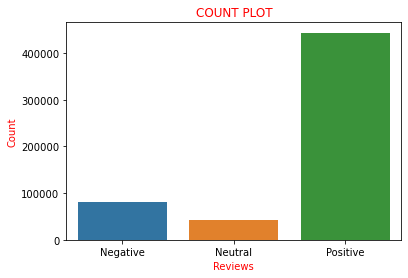

In [9]:
sns.countplot(a)
plt.xlabel('Reviews', color = 'red')
plt.ylabel('Count', color = 'red')
plt.xticks([0,1,2],['Negative','Neutral','Positive'])
plt.title('COUNT PLOT', color = 'r')
plt.show()

In [12]:
data['sentiment']=a
#data
final_dataset = data[['review_text','sentiment']]
final_dataset

C:\Users\chirl\AppData\Local\Temp/ipykernel_6844/3881911147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment']=a


,review_text,sentiment
0,"Вкусная питца, естт летнее кафе, доставка, при...",2
1,Думал можно днём с детьми посидеть на открытой...,0
2,"Есть веранда, вкусная пицца, делают по половин...",2
3,Уже второй раз забивают на заказ,0
4,Любимая пиццерия! 👍,2
...,...,...
328640,Очень вкусная пицца!!!!,2
328641,"Лучший борщ на Роза Хутор!!! Большая порция, т...",2
328642,Все понравилось! Пицца норм,2
328643,"обслуживание нормальное, соотношение цена/каче...",0


In [13]:
data_p=final_dataset[data['sentiment']==2]
data_n=final_dataset[data['sentiment']==0]
len(data_p), len(data_n)

(275180, 32936)

In [15]:
datap = data_p.iloc[np.random.randint(1, 275180,5000), :]
datan = data_n.iloc[np.random.randint(1, 32936,5000), :]
len(datan), len(datap)

(5000, 5000)

In [20]:
data = pd.concat([datap,datan])
len(data)

10000

In [21]:
c=[]
for i in data['sentiment']:
    if i==0:
        c.append(0)
    if i==2:
        c.append(1)
data['sentiment']==c

71622     False
292496    False
206693    False
303048    False
292872    False
          ...  
65172      True
6357       True
37599      True
283916     True
269309     True
Name: sentiment, Length: 10000, dtype: bool

C:\Users\chirl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


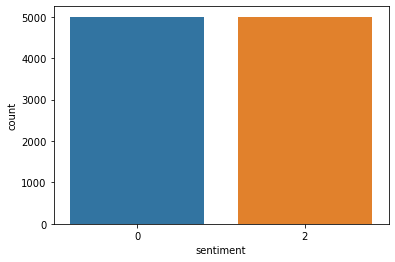

In [22]:
sns.countplot(data['sentiment'])
plt.show()

In [23]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
data['review'] = data['review_text'].apply(strip_html)

data=data.drop('review_text',axis=1)

data.head()

,sentiment,review
71622,2,Одно из моих любимых мест)))) покушать и потан...
292496,2,"Большое разнообразие пиццы, заказываем на обед..."
206693,2,"Уютно, вкусно, приемлемые цены. Советую."
303048,2,"Пицца очень вкусная, коктейли тоже!! Достаточн..."
292872,2,Очень вкусный Бенедикт с лососем


# MODEL BUILDING

In [24]:
import nltk  
def punc_clean(text):
    import string as st
    a=[w for w in text if w not in st.punctuation]
    return ''.join(a)
data['review'] = data['review'].apply(punc_clean)
data.head(2)

,sentiment,review
71622,2,Одно из моих любимых мест покушать и потанцева...
292496,2,Большое разнообразие пиццы заказываем на обед ...


In [28]:
def remove_stopword(text):
    stopword=nltk.corpus.stopwords.words('russian')
    stopword.remove('нет')
    a=[w for w in nltk.word_tokenize(text) if w not in stopword]
    return ' '.join(a)
data['review'] = data['review'].apply(remove_stopword)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectr = TfidfVectorizer(ngram_range=(1,2),min_df=1)
vectr.fit(data['review'])

vect_X = vectr.transform(data['review'])

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

clf=model.fit(vect_X,data['sentiment'])
clf.score(vect_X,data['sentiment'])*100

95.94

# PREDICTION

In [32]:
clf.predict(vectr.transform(['''Я люблю''']))

array([2], dtype=int64)

In [33]:
clf.predict(vectr.transform(['''Я ненавижу''']))

array([0], dtype=int64)